## Comparison of TRENDY v10 and v11 at the DBEN sites

In [1]:
from scipy.stats import qmc
import numpy as np

import csv
import xarray as xr
import pandas as pd
import os
import netCDF4 as nc4
import sys
import shutil
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                                                                                                                                                                       
import tempfile 
import random
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs


In [2]:
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

In [3]:
def mon_mean(x):
        return x.groupby('time.month').mean('time')

### Load Solar v 11

In [4]:
solar_v11_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/BCI/clmforc.TRENDY.bci.c2022_0.5x0.5.Solr.full.nc'
solar_v11_bci = xr.open_dataset(solar_v11_bci)

In [5]:
fsds_v11_bci_diffuse = np.squeeze(solar_v11_bci.FSDS_DIFFUSE)
fsds_v11_bci_diffuse = fsds_v11_bci_diffuse.groupby('time.year').apply(mon_mean)
fsds_v11_bci_diffuse = fsds_v11_bci_diffuse.stack(time=('year','month'))
fsds_v11_bci_direct = np.squeeze(solar_v11_bci.FSDS_DIRECT)
fsds_v11_bci_direct = fsds_v11_bci_direct.groupby('time.year').apply(mon_mean)
fsds_v11_bci_direct = fsds_v11_bci_direct.stack(time=('year','month'))

In [6]:
solar_v11_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/BIA/clmforc.TRENDY.bia.c2022_0.5x0.5.Solr.full.nc'
solar_v11_bia = xr.open_dataset(solar_v11_bia)

In [7]:
fsds_v11_bia_diffuse = np.squeeze(solar_v11_bia.FSDS_DIFFUSE)
fsds_v11_bia_diffuse = fsds_v11_bia_diffuse.groupby('time.year').apply(mon_mean)
fsds_v11_bia_diffuse = fsds_v11_bia_diffuse.stack(time=('year','month'))
fsds_v11_bia_direct = np.squeeze(solar_v11_bia.FSDS_DIRECT)
fsds_v11_bia_direct = fsds_v11_bia_direct.groupby('time.year').apply(mon_mean)
fsds_v11_bia_direct = fsds_v11_bia_direct.stack(time=('year','month'))

In [8]:
solar_v11_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/FI/clmforc.TRENDY.fi.c2022_0.5x0.5.Solr.full.nc'
solar_v11_fi = xr.open_dataset(solar_v11_fi)

In [9]:
fsds_v11_fi_diffuse = np.squeeze(solar_v11_fi.FSDS_DIFFUSE)
fsds_v11_fi_diffuse = fsds_v11_fi_diffuse.groupby('time.year').apply(mon_mean)
fsds_v11_fi_diffuse = fsds_v11_fi_diffuse.stack(time=('year','month'))
fsds_v11_fi_direct = np.squeeze(solar_v11_fi.FSDS_DIRECT)
fsds_v11_fi_direct = fsds_v11_fi_direct.groupby('time.year').apply(mon_mean)
fsds_v11_fi_direct = fsds_v11_fi_direct.stack(time=('year','month'))

### Load Solar v10 

#### BCI

In [10]:
tswrf_v10_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BCI/tswrf_v10_full.nc'
tswrf_v10_bci = xr.open_dataset(tswrf_v10_bci)
tswrf_v10_bci = np.squeeze(tswrf_v10_bci.tswrf) # total downward SW flux at surface
tswrf_v10_bci = tswrf_v10_bci.groupby('time.year').apply(mon_mean)
tswrf_v10_bci = tswrf_v10_bci.stack(time=('year','month'))

In [11]:
fd_v10_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BCI/fd_v10_full.nc'
fd_v10_bci = xr.open_dataset(fd_v10_bci)
fd_v10_bci = np.squeeze(fd_v10_bci.fd) # diffuse fraction of downward SW flux at surface
fd_v10_bci = fd_v10_bci.groupby('time.year').apply(mon_mean)
fd_v10_bci = fd_v10_bci.stack(time=('year','month'))

In [12]:
fsds_v10_bci_diffuse = fd_v10_bci * tswrf_v10_bci
fsds_v10_bci_direct = tswrf_v10_bci - fsds_v10_bci_diffuse

#### BIA

In [13]:
tswrf_v10_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BIA/tswrf_v10_full.nc'
tswrf_v10_bia = xr.open_dataset(tswrf_v10_bia)
tswrf_v10_bia = np.squeeze(tswrf_v10_bia.tswrf) # total downward SW flux at surface
tswrf_v10_bia = tswrf_v10_bia.groupby('time.year').apply(mon_mean)
tswrf_v10_bia = tswrf_v10_bia.stack(time=('year','month'))

In [14]:
fd_v10_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BIA/fd_v10_full.nc'
fd_v10_bia = xr.open_dataset(fd_v10_bia)
fd_v10_bia = np.squeeze(fd_v10_bia.fd) # diffuse fraction of downward SW flux at surfac
fd_v10_bia = fd_v10_bia.groupby('time.year').apply(mon_mean)
fd_v10_bia = fd_v10_bia.stack(time=('year','month'))

In [15]:
fsds_v10_bia_diffuse = fd_v10_bia * tswrf_v10_bia
fsds_v10_bia_direct = tswrf_v10_bia - fsds_v10_bia_diffuse

#### FI

In [16]:
tswrf_v10_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/FIN/tswrf_v10_full.nc'
tswrf_v10_fi = xr.open_dataset(tswrf_v10_fi)
tswrf_v10_fi = np.squeeze(tswrf_v10_fi.tswrf) # total downward SW flux at surface
tswrf_v10_fi = tswrf_v10_fi.groupby('time.year').apply(mon_mean)
tswrf_v10_fi = tswrf_v10_fi.stack(time=('year','month'))

In [17]:
fd_v10_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/FIN/fd_v10_full.nc'
fd_v10_fi = xr.open_dataset(fd_v10_fi)
fd_v10_fi = np.squeeze(fd_v10_fi.fd) # diffuse fraction of downward SW flux at surfac
fd_v10_fi = fd_v10_fi.groupby('time.year').apply(mon_mean)
fd_v10_fi = fd_v10_fi.stack(time=('year','month'))

In [18]:
fsds_v10_fi_diffuse = fd_v10_fi * tswrf_v10_fi
fsds_v10_fi_direct = tswrf_v10_fi - fsds_v10_fi_diffuse

''

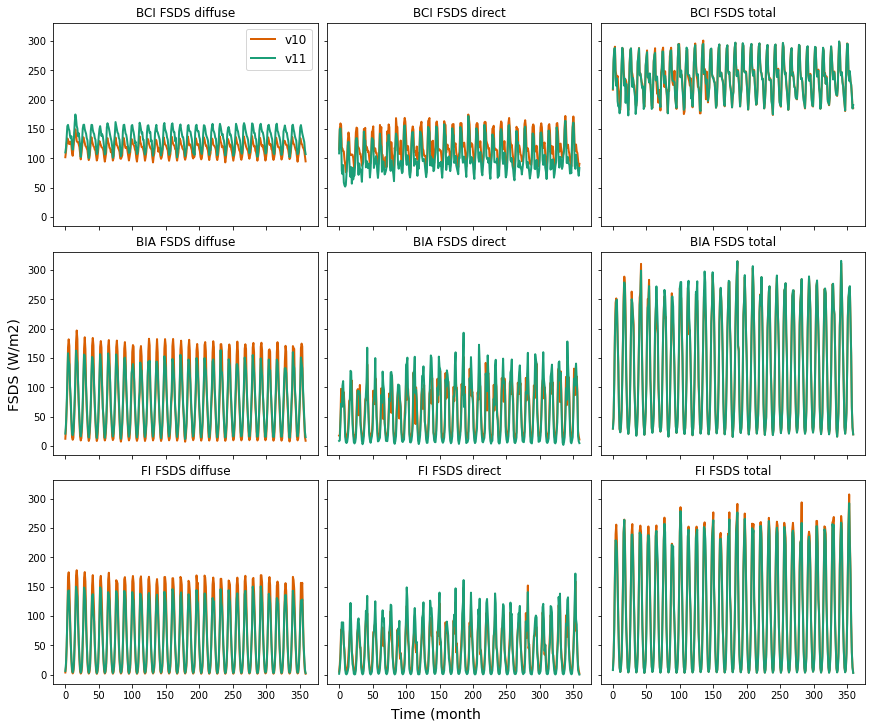

In [19]:
fig2, ((f2ax0,f2ax1,f2ax2),(f2ax3,f2ax4,f2ax5),(f2ax6,f2ax7,f2ax8)) = plt.subplots(nrows=3,ncols=3, 
                                                                 figsize=(12,10),sharex=True,sharey=True,
                                                                constrained_layout=True)
 
f2ax0.plot(fsds_v10_bci_diffuse, color=colormap[1], linewidth=2, label = 'v10')
f2ax0.plot(fsds_v11_bci_diffuse, color=colormap[0], linewidth=2, label = 'v11')
f2ax0.set_title('BCI FSDS diffuse', fontsize = 12)
f2ax0.legend(fontsize=12)
f2ax1.plot(fsds_v10_bci_direct, color=colormap[1], linewidth=2)
f2ax1.plot(fsds_v11_bci_direct, color=colormap[0], linewidth=2)
f2ax1.set_title('BCI FSDS direct', fontsize = 12)
f2ax2.plot(fsds_v10_bci_diffuse + fsds_v10_bci_direct, color=colormap[1], linewidth=2)
f2ax2.plot(fsds_v11_bci_diffuse + fsds_v11_bci_direct, color=colormap[0], linewidth=2)
f2ax2.set_title('BCI FSDS total', fontsize = 12)

f2ax3.plot(fsds_v10_bia_diffuse, color=colormap[1], linewidth=2)
f2ax3.plot(fsds_v11_bia_diffuse, color=colormap[0], linewidth=2)
f2ax3.set_title('BIA FSDS diffuse', fontsize = 12)
f2ax4.plot(fsds_v10_bia_direct, color=colormap[1], linewidth=2)
f2ax4.plot(fsds_v11_bia_direct, color=colormap[0], linewidth=2)
f2ax4.set_title('BIA FSDS direct', fontsize = 12)
f2ax5.plot(fsds_v10_bia_diffuse + fsds_v10_bia_direct, color=colormap[1], linewidth=2)
f2ax5.plot(fsds_v11_bia_diffuse + fsds_v11_bia_direct, color=colormap[0], linewidth=2)
f2ax5.set_title('BIA FSDS total', fontsize = 12)

f2ax6.plot(fsds_v10_fi_diffuse, color=colormap[1], linewidth=2)
f2ax6.plot(fsds_v11_fi_diffuse, color=colormap[0], linewidth=2)
f2ax6.set_title('FI FSDS diffuse', fontsize = 12)
f2ax7.plot(fsds_v10_fi_direct, color=colormap[1], linewidth=2)
f2ax7.plot(fsds_v11_fi_direct, color=colormap[0], linewidth=2)
f2ax7.set_title('FI FSDS direct', fontsize = 12)
f2ax8.plot(fsds_v10_fi_diffuse + fsds_v10_fi_direct, color=colormap[1], linewidth=2)
f2ax8.plot(fsds_v11_fi_diffuse + fsds_v11_fi_direct, color=colormap[0], linewidth=2)
f2ax8.set_title('FI FSDS total', fontsize = 12)

fig2.supylabel('FSDS (W/m2)', fontsize = 14)
fig2.supxlabel('Time (month', fontsize = 14)


plt.savefig('TRENDY_FSDS_v10_v_v11.png', facecolor='white')

;

### Load Prec v11

In [20]:
prec_v11_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/BCI/clmforc.TRENDY.bci.c2022_0.5x0.5.Prec.full.nc'
prec_v11_bci = xr.open_dataset(prec_v11_bci)

In [21]:
prec_v11_bci = np.squeeze(prec_v11_bci.PRECTmms)
prec_v11_bci = prec_v11_bci.groupby('time.year').apply(mon_mean)
prec_v11_bci = prec_v11_bci.stack(time=('year','month'))


In [22]:
prec_v11_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/BIA/clmforc.TRENDY.bia.c2022_0.5x0.5.Prec.full.nc'
prec_v11_bia = xr.open_dataset(prec_v11_bia)

In [23]:
prec_v11_bia = np.squeeze(prec_v11_bia.PRECTmms)
prec_v11_bia = prec_v11_bia.groupby('time.year').apply(mon_mean)
prec_v11_bia = prec_v11_bia.stack(time=('year','month'))


In [24]:
prec_v11_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/FI/clmforc.TRENDY.fi.c2022_0.5x0.5.Prec.full.nc'
prec_v11_fi = xr.open_dataset(prec_v11_fi)

In [25]:
prec_v11_fi = np.squeeze(prec_v11_fi.PRECTmms)
prec_v11_fi = prec_v11_fi.groupby('time.year').apply(mon_mean)
prec_v11_fi = prec_v11_fi.stack(time=('year','month'))


### Load Prec v10

In [26]:
prec_v10_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BCI/crujra.v2.2.5d.pre.full.nc'
prec_v10_bci = xr.open_dataset(prec_v10_bci)
prec_v10_bci = np.squeeze(prec_v10_bci.pre)
prec_v10_bci = prec_v10_bci.groupby('time.year').apply(mon_mean)
prec_v10_bci = prec_v10_bci.stack(time=('year','month'))
prec_v10_bci = prec_v10_bci  /  (60*60*6)

In [27]:
prec_v10_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BIA/crujra.v2.2.5d.pre.full.nc'
prec_v10_bia = xr.open_dataset(prec_v10_bia)
prec_v10_bia = np.squeeze(prec_v10_bia.pre)
prec_v10_bia = prec_v10_bia.groupby('time.year').apply(mon_mean)
prec_v10_bia = prec_v10_bia.stack(time=('year','month'))
prec_v10_bia = prec_v10_bia  /  (60*60*6)

In [28]:
prec_v10_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/FIN/crujra.v2.2.5d.pre.full.nc'
prec_v10_fi = xr.open_dataset(prec_v10_fi)
prec_v10_fi = np.squeeze(prec_v10_fi.pre)
prec_v10_fi = prec_v10_fi.groupby('time.year').apply(mon_mean)
prec_v10_fi = prec_v10_fi.stack(time=('year','month'))
prec_v10_fi = prec_v10_fi  /  (60*60*6)

''

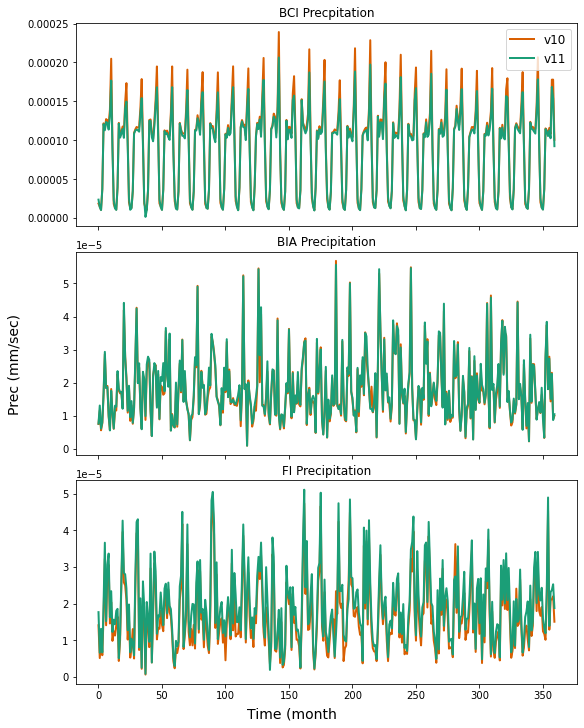

In [29]:
fig2, ((f2ax0),(f2ax1),(f2ax2)) = plt.subplots(nrows=3,ncols=1, 
                                                                 figsize=(8,10),sharex=True,
                                                                constrained_layout=True)
 
f2ax0.plot(prec_v10_bci, color=colormap[1], linewidth=2, label = 'v10')
f2ax0.plot(prec_v11_bci, color=colormap[0], linewidth=2, label = 'v11')
f2ax0.set_title('BCI Precpitation', fontsize = 12)
f2ax0.legend(fontsize=12)

f2ax1.plot(prec_v10_bia, color=colormap[1], linewidth=2, label = 'v10')
f2ax1.plot(prec_v11_bia, color=colormap[0], linewidth=2, label = 'BIA v11')
f2ax1.set_title('BIA Precipitation', fontsize = 12)

f2ax2.plot(prec_v10_fi, color=colormap[1], linewidth=2, label = 'v10')
f2ax2.plot(prec_v11_fi, color=colormap[0], linewidth=2, label = 'FI v11')
f2ax2.set_title('FI Precipitation', fontsize = 12)

fig2.supylabel('Prec (mm/sec)', fontsize = 14)
fig2.supxlabel('Time (month', fontsize = 14)
;

### Load TPQWL V11

In [30]:
TPQWL_v11_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/BCI/clmforc.TRENDY.bci.c2022_0.5x0.5.TPQWL.full.nc'
TPQWL_v11_bci = xr.open_dataset(TPQWL_v11_bci)

In [31]:
FLDS_v11_bci = np.squeeze(TPQWL_v11_bci.FLDS)
FLDS_v11_bci = FLDS_v11_bci.groupby('time.year').apply(mon_mean)
FLDS_v11_bci = FLDS_v11_bci.stack(time=('year','month'))

PSRF_v11_bci = np.squeeze(TPQWL_v11_bci.PSRF)
PSRF_v11_bci = PSRF_v11_bci.groupby('time.year').apply(mon_mean)
PSRF_v11_bci = PSRF_v11_bci.stack(time=('year','month'))

QBOT_v11_bci = np.squeeze(TPQWL_v11_bci.QBOT)
QBOT_v11_bci = QBOT_v11_bci.groupby('time.year').apply(mon_mean)
QBOT_v11_bci = QBOT_v11_bci.stack(time=('year','month'))

TBOT_v11_bci = np.squeeze(TPQWL_v11_bci.TBOT)
TBOT_v11_bci = TBOT_v11_bci.groupby('time.year').apply(mon_mean)
TBOT_v11_bci = TBOT_v11_bci.stack(time=('year','month'))

WIND_v11_bci = np.squeeze(TPQWL_v11_bci.WIND)
WIND_v11_bci = WIND_v11_bci.groupby('time.year').apply(mon_mean)
WIND_v11_bci = WIND_v11_bci.stack(time=('year','month'))

In [32]:
TPQWL_v11_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/BIA/clmforc.TRENDY.bia.c2022_0.5x0.5.TPQWL.full.nc'
TPQWL_v11_bia = xr.open_dataset(TPQWL_v11_bia)

In [33]:
FLDS_v11_bia = np.squeeze(TPQWL_v11_bia.FLDS)
FLDS_v11_bia = FLDS_v11_bia.groupby('time.year').apply(mon_mean)
FLDS_v11_bia = FLDS_v11_bia.stack(time=('year','month'))

PSRF_v11_bia = np.squeeze(TPQWL_v11_bia.PSRF)
PSRF_v11_bia = PSRF_v11_bia.groupby('time.year').apply(mon_mean)
PSRF_v11_bia = PSRF_v11_bia.stack(time=('year','month'))

QBOT_v11_bia = np.squeeze(TPQWL_v11_bia.QBOT)
QBOT_v11_bia = QBOT_v11_bia.groupby('time.year').apply(mon_mean)
QBOT_v11_bia = QBOT_v11_bia.stack(time=('year','month'))

TBOT_v11_bia = np.squeeze(TPQWL_v11_bia.TBOT)
TBOT_v11_bia = TBOT_v11_bia.groupby('time.year').apply(mon_mean)
TBOT_v11_bia = TBOT_v11_bia.stack(time=('year','month'))

WIND_v11_bia = np.squeeze(TPQWL_v11_bia.WIND)
WIND_v11_bia = WIND_v11_bia.groupby('time.year').apply(mon_mean)
WIND_v11_bia = WIND_v11_bia.stack(time=('year','month'))


In [34]:
TPQWL_v11_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/FI/clmforc.TRENDY.fi.c2022_0.5x0.5.TPQWL.full.nc'
TPQWL_v11_fi = xr.open_dataset(TPQWL_v11_fi)

In [35]:
FLDS_v11_fi = np.squeeze(TPQWL_v11_fi.FLDS)
FLDS_v11_fi = FLDS_v11_fi.groupby('time.year').apply(mon_mean)
FLDS_v11_fi = FLDS_v11_fi.stack(time=('year','month'))

PSRF_v11_fi = np.squeeze(TPQWL_v11_fi.PSRF)
PSRF_v11_fi = PSRF_v11_fi.groupby('time.year').apply(mon_mean)
PSRF_v11_fi = PSRF_v11_fi.stack(time=('year','month'))

QBOT_v11_fi = np.squeeze(TPQWL_v11_fi.QBOT)
QBOT_v11_fi = QBOT_v11_fi.groupby('time.year').apply(mon_mean)
QBOT_v11_fi = QBOT_v11_fi.stack(time=('year','month'))

TBOT_v11_fi = np.squeeze(TPQWL_v11_fi.TBOT)
TBOT_v11_fi = TBOT_v11_fi.groupby('time.year').apply(mon_mean)
TBOT_v11_fi = TBOT_v11_fi.stack(time=('year','month'))

WIND_v11_fi = np.squeeze(TPQWL_v11_fi.WIND)
WIND_v11_fi = WIND_v11_fi.groupby('time.year').apply(mon_mean)
WIND_v11_fi = WIND_v11_fi.stack(time=('year','month'))


### Load TPQWL v10 

In [36]:
# FLDS
dlwrf_v10_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BCI/crujra.v2.2.5d.dlwrf.full.nc'
dlwrf_v10_bci = xr.open_dataset(dlwrf_v10_bci)
FLDS_v10_bci = np.squeeze(dlwrf_v10_bci.dlwrf)
FLDS_v10_bci = FLDS_v10_bci.groupby('time.year').apply(mon_mean)
FLDS_v10_bci = FLDS_v10_bci.stack(time=('year','month'))

dlwrf_v10_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BIA/crujra.v2.2.5d.dlwrf.full.nc'
dlwrf_v10_bia = xr.open_dataset(dlwrf_v10_bia)
FLDS_v10_bia = np.squeeze(dlwrf_v10_bia.dlwrf)
FLDS_v10_bia = FLDS_v10_bia.groupby('time.year').apply(mon_mean)
FLDS_v10_bia = FLDS_v10_bia.stack(time=('year','month'))

dlwrf_v10_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/FIN/crujra.v2.2.5d.dlwrf.full.nc'
dlwrf_v10_fi = xr.open_dataset(dlwrf_v10_fi)
FLDS_v10_fi = np.squeeze(dlwrf_v10_fi.dlwrf)
FLDS_v10_fi = FLDS_v10_fi.groupby('time.year').apply(mon_mean)
FLDS_v10_fi = FLDS_v10_fi.stack(time=('year','month'))


In [37]:
# PSRF
PSRF_v10_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BCI/crujra.v2.2.5d.pres.full.nc'
PSRF_v10_bci = xr.open_dataset(PSRF_v10_bci)
PSRF_v10_bci = np.squeeze(PSRF_v10_bci.pres)
PSRF_v10_bci = PSRF_v10_bci.groupby('time.year').apply(mon_mean)
PSRF_v10_bci = PSRF_v10_bci.stack(time=('year','month'))

PSRF_v10_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BIA/crujra.v2.2.5d.pres.full.nc'
PSRF_v10_bia = xr.open_dataset(PSRF_v10_bia)
PSRF_v10_bia = np.squeeze(PSRF_v10_bia.pres)
PSRF_v10_bia = PSRF_v10_bia.groupby('time.year').apply(mon_mean)
PSRF_v10_bia = PSRF_v10_bia.stack(time=('year','month'))

PSRF_v10_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/FIN/crujra.v2.2.5d.pres.full.nc'
PSRF_v10_fi = xr.open_dataset(PSRF_v10_fi)
PSRF_v10_fi = np.squeeze(PSRF_v10_fi.pres)
PSRF_v10_fi = PSRF_v10_fi.groupby('time.year').apply(mon_mean)
PSRF_v10_fi = PSRF_v10_fi.stack(time=('year','month'))


In [38]:
# QBOT
QBOT_v10_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BCI/crujra.v2.2.5d.spfh.full.nc'
QBOT_v10_bci = xr.open_dataset(QBOT_v10_bci)
QBOT_v10_bci = np.squeeze(QBOT_v10_bci.spfh)
QBOT_v10_bci = QBOT_v10_bci.groupby('time.year').apply(mon_mean)
QBOT_v10_bci = QBOT_v10_bci.stack(time=('year','month'))

QBOT_v10_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BIA/crujra.v2.2.5d.spfh.full.nc'
QBOT_v10_bia = xr.open_dataset(QBOT_v10_bia)
QBOT_v10_bia = np.squeeze(QBOT_v10_bia.spfh)
QBOT_v10_bia = QBOT_v10_bia.groupby('time.year').apply(mon_mean)
QBOT_v10_bia = QBOT_v10_bia.stack(time=('year','month'))

QBOT_v10_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/FIN/crujra.v2.2.5d.spfh.full.nc'
QBOT_v10_fi = xr.open_dataset(QBOT_v10_fi)
QBOT_v10_fi = np.squeeze(QBOT_v10_fi.spfh)
QBOT_v10_fi = QBOT_v10_fi.groupby('time.year').apply(mon_mean)
QBOT_v10_fi = QBOT_v10_fi.stack(time=('year','month'))


In [39]:
# TBOT
TBOT_v10_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BCI/crujra.v2.2.5d.tmp.full.nc'
TBOT_v10_bci = xr.open_dataset(TBOT_v10_bci)
TBOT_v10_bci = np.squeeze(TBOT_v10_bci.tmp)
TBOT_v10_bci = TBOT_v10_bci.groupby('time.year').apply(mon_mean)
TBOT_v10_bci = TBOT_v10_bci.stack(time=('year','month'))

TBOT_v10_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BIA/crujra.v2.2.5d.tmp.full.nc'
TBOT_v10_bia = xr.open_dataset(TBOT_v10_bia)
TBOT_v10_bia = np.squeeze(TBOT_v10_bia.tmp)
TBOT_v10_bia = TBOT_v10_bia.groupby('time.year').apply(mon_mean)
TBOT_v10_bia = TBOT_v10_bia.stack(time=('year','month'))

TBOT_v10_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/FIN/crujra.v2.2.5d.tmp.full.nc'
TBOT_v10_fi = xr.open_dataset(TBOT_v10_fi)
TBOT_v10_fi = np.squeeze(TBOT_v10_fi.tmp)
TBOT_v10_fi = TBOT_v10_fi.groupby('time.year').apply(mon_mean)
TBOT_v10_fi = TBOT_v10_fi.stack(time=('year','month'))


In [40]:
# Wind
WIND_v10_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BCI/crujra.v2.2.5d.vgrd.full.nc'
WIND_v10_bci = xr.open_dataset(WIND_v10_bci)
WIND_v10_bci = np.squeeze(WIND_v10_bci.vgrd)
WIND_v10_bci = WIND_v10_bci.groupby('time.year').apply(mon_mean)
WIND_v10_bci = WIND_v10_bci.stack(time=('year','month'))

WIND_v10_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BIA/crujra.v2.2.5d.vgrd.full.nc'
WIND_v10_bia = xr.open_dataset(WIND_v10_bia)
WIND_v10_bia = np.squeeze(WIND_v10_bia.vgrd)
WIND_v10_bia = WIND_v10_bia.groupby('time.year').apply(mon_mean)
WIND_v10_bia = WIND_v10_bia.stack(time=('year','month'))

WIND_v10_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/FIN/crujra.v2.2.5d.vgrd.full.nc'
WIND_v10_fi = xr.open_dataset(WIND_v10_fi)
WIND_v10_fi = np.squeeze(WIND_v10_fi.vgrd)
WIND_v10_fi = WIND_v10_fi.groupby('time.year').apply(mon_mean)
WIND_v10_fi = WIND_v10_fi.stack(time=('year','month'))

ugrd_v10_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BCI/crujra.v2.2.5d.ugrd.full.nc'
ugrd_v10_bci = xr.open_dataset(ugrd_v10_bci)
ugrd_v10_bci = np.squeeze(ugrd_v10_bci.ugrd)
ugrd_v10_bci = ugrd_v10_bci.groupby('time.year').apply(mon_mean)
ugrd_v10_bci = ugrd_v10_bci.stack(time=('year','month'))

ugrd_v10_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/BIA/crujra.v2.2.5d.ugrd.full.nc'
ugrd_v10_bia = xr.open_dataset(ugrd_v10_bia)
ugrd_v10_bia = np.squeeze(ugrd_v10_bia.ugrd)
ugrd_v10_bia = ugrd_v10_bia.groupby('time.year').apply(mon_mean)
ugrd_v10_bia = ugrd_v10_bia.stack(time=('year','month'))

ugrd_v10_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/CRUJRA2021_6hourly/FIN/crujra.v2.2.5d.ugrd.full.nc'
ugrd_v10_fi = xr.open_dataset(ugrd_v10_fi)
ugrd_v10_fi = np.squeeze(ugrd_v10_fi.ugrd)
ugrd_v10_fi = ugrd_v10_fi.groupby('time.year').apply(mon_mean)
ugrd_v10_fi = ugrd_v10_fi.stack(time=('year','month'))


WIND_v10_bci = WIND_v10_bci + ugrd_v10_bci
WIND_v10_bia = WIND_v10_bia + ugrd_v10_bia
WIND_v10_fi = WIND_v10_fi + ugrd_v10_fi

''

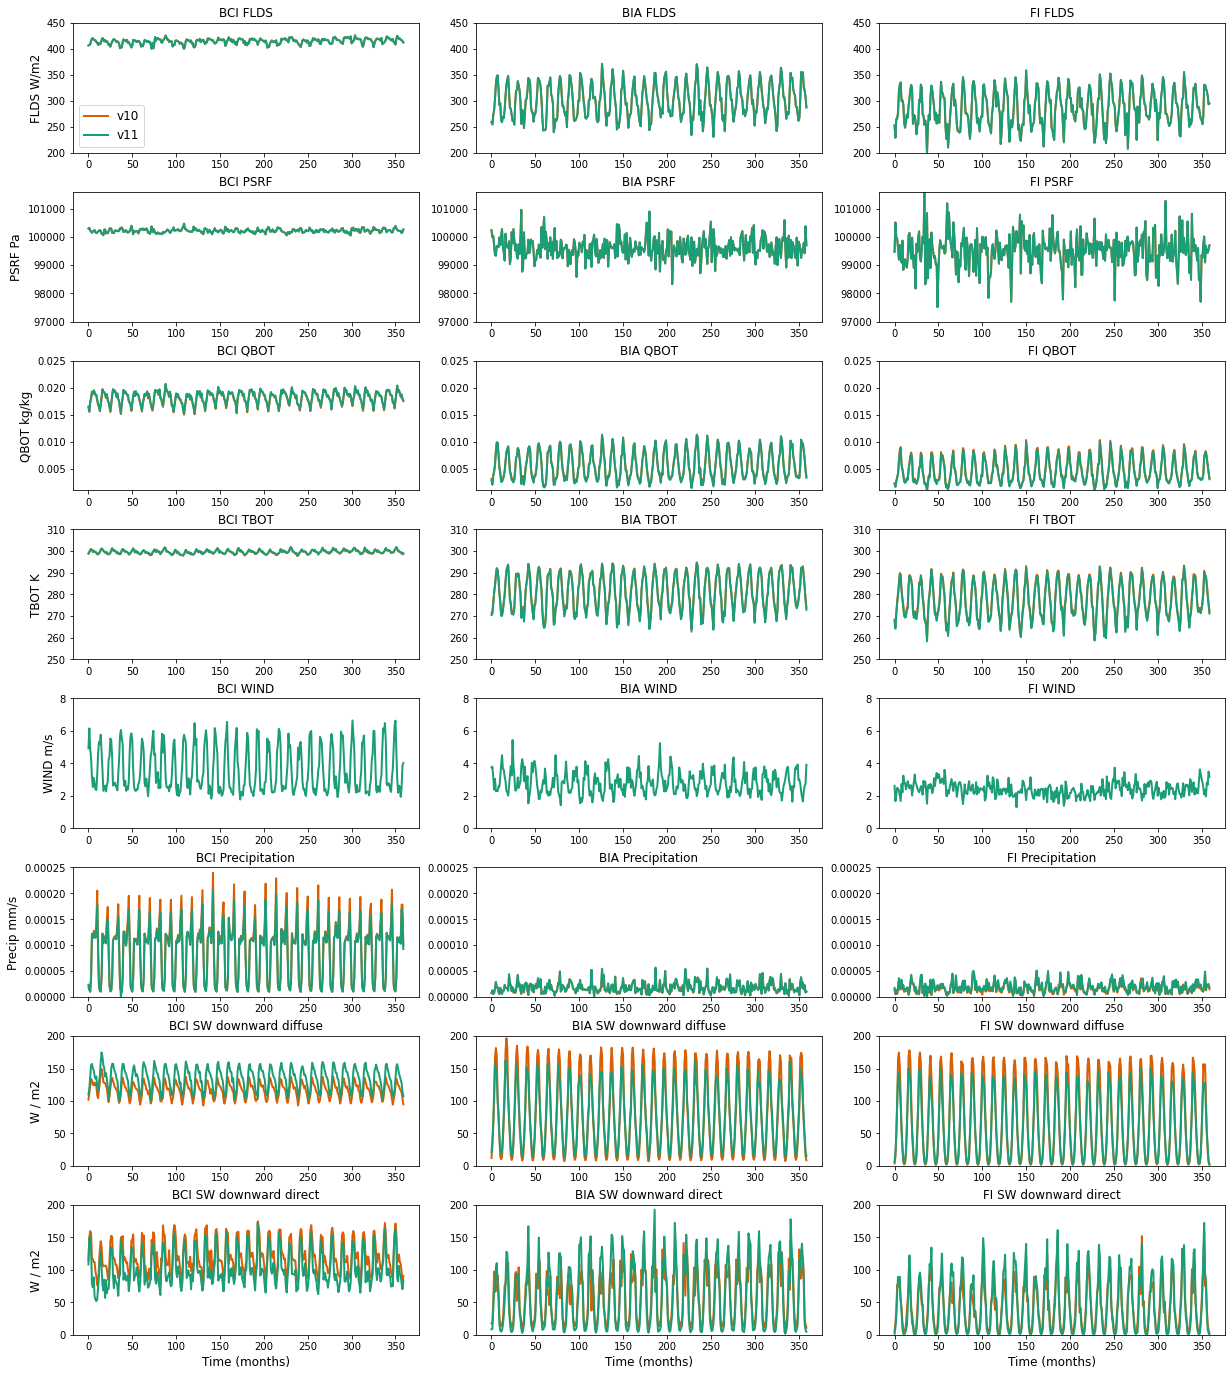

In [41]:
fig2, ((f2ax0,f2ax1,f2ax2),(f2ax3,f2ax4,f2ax5), (f2ax6,f2ax7,f2ax8),
      (f2ax9,f2ax10,f2ax11),(f2ax12,f2ax13,f2ax14),
      (f2ax15,f2ax16,f2ax17), (f2ax18,f2ax19,f2ax20),
      (f2ax21,f2ax22,f2ax23)) = plt.subplots(nrows=8,ncols=3,figsize=(17,19),constrained_layout=True)

f2ax0.plot(FLDS_v10_bci, color=colormap[1], linewidth=2, label = 'v10')
f2ax0.plot(FLDS_v11_bci, color=colormap[0], linewidth=2, label = 'v11')
f2ax0.set_title('BCI FLDS', fontsize = 12)
f2ax0.set_ylabel('FLDS W/m2', fontsize = 12)
f2ax0.set_ylim(200,450)
f2ax0.legend(fontsize=12)
f2ax1.plot(FLDS_v10_bia, color=colormap[1], linewidth=2)
f2ax1.plot(FLDS_v11_bia, color=colormap[0], linewidth=2)
f2ax1.set_title('BIA FLDS', fontsize = 12)
f2ax1.set_ylim(200,450)
f2ax2.plot(FLDS_v10_fi, color=colormap[1], linewidth=2)
f2ax2.plot(FLDS_v11_fi, color=colormap[0], linewidth=2)
f2ax2.set_title('FI FLDS', fontsize = 12)
f2ax2.set_ylim(200,450)

f2ax3.plot(PSRF_v10_bci, color=colormap[1], linewidth=2)
f2ax3.plot(PSRF_v11_bci, color=colormap[0], linewidth=2)
f2ax3.set_title('BCI PSRF', fontsize = 12)
f2ax3.set_ylabel('PSRF Pa', fontsize = 12)
f2ax3.set_ylim(97000,101600)
f2ax4.plot(PSRF_v10_bia, color=colormap[1], linewidth=2)
f2ax4.plot(PSRF_v11_bia, color=colormap[0], linewidth=2)
f2ax4.set_title('BIA PSRF', fontsize = 12)
f2ax4.set_ylim(97000,101600)
f2ax5.plot(PSRF_v10_fi, color=colormap[1], linewidth=2)
f2ax5.plot(PSRF_v11_fi, color=colormap[0], linewidth=2)
f2ax5.set_title('FI PSRF', fontsize = 12)
f2ax5.set_ylim(97000,101600)

f2ax6.plot(QBOT_v10_bci, color=colormap[1], linewidth=2)
f2ax6.plot(QBOT_v11_bci, color=colormap[0], linewidth=2)
f2ax6.set_title('BCI QBOT', fontsize = 12)
f2ax6.set_ylabel('QBOT kg/kg', fontsize = 12)
f2ax6.set_ylim(0.001,0.025)
f2ax7.plot(QBOT_v10_bia, color=colormap[1], linewidth=2)
f2ax7.plot(QBOT_v11_bia, color=colormap[0], linewidth=2)
f2ax7.set_title('BIA QBOT', fontsize = 12)
f2ax7.set_ylim(0.001,0.025)
f2ax8.plot(QBOT_v10_fi, color=colormap[1], linewidth=2)
f2ax8.plot(QBOT_v11_fi, color=colormap[0], linewidth=2)
f2ax8.set_title('FI QBOT', fontsize = 12)
f2ax8.set_ylim(0.001,0.025)

f2ax9.plot(TBOT_v10_bci, color=colormap[1], linewidth=2)
f2ax9.plot(TBOT_v11_bci, color=colormap[0], linewidth=2)
f2ax9.set_title('BCI TBOT', fontsize = 12)
f2ax9.set_ylabel('TBOT K', fontsize = 12)
f2ax9.set_ylim(250,310)
f2ax10.plot(TBOT_v10_bia, color=colormap[1], linewidth=2)
f2ax10.plot(TBOT_v11_bia, color=colormap[0], linewidth=2)
f2ax10.set_title('BIA TBOT', fontsize = 12)
f2ax10.set_ylim(250,310)
f2ax11.plot(TBOT_v10_fi, color=colormap[1], linewidth=2)
f2ax11.plot(TBOT_v11_fi, color=colormap[0], linewidth=2)
f2ax11.set_title('FI TBOT', fontsize = 12)
f2ax11.set_ylim(250,310)

#f2ax12.plot(WIND_v10_bci, color=colormap[1], linewidth=2)
f2ax12.plot(WIND_v11_bci, color=colormap[0], linewidth=2)
f2ax12.set_title('BCI WIND', fontsize = 12)
f2ax12.set_ylabel('WIND m/s', fontsize = 12)
f2ax12.set_ylim(0,8)
#f2ax13.plot(WIND_v10_bia, color=colormap[1], linewidth=2)
f2ax13.plot(WIND_v11_bia, color=colormap[0], linewidth=2)
f2ax13.set_title('BIA WIND', fontsize = 12)
f2ax13.set_ylim(0,8)
#f2ax14.plot(WIND_v10_fi, color=colormap[1], linewidth=2)
f2ax14.plot(WIND_v11_fi, color=colormap[0], linewidth=2)
f2ax14.set_title('FI WIND', fontsize = 12)
f2ax14.set_ylim(0,8)

f2ax15.plot(prec_v10_bci, color=colormap[1], linewidth=2)
f2ax15.plot(prec_v11_bci, color=colormap[0], linewidth=2)
f2ax15.set_title('BCI Precipitation', fontsize = 12)
f2ax15.set_ylabel('Precip mm/s', fontsize = 12)
f2ax15.set_ylim(0,0.00025)
f2ax16.plot(prec_v10_bia, color=colormap[1], linewidth=2)
f2ax16.plot(prec_v11_bia, color=colormap[0], linewidth=2)
f2ax16.set_title('BIA Precipitation', fontsize = 12)
f2ax16.set_ylim(0,0.00025)
f2ax17.plot(prec_v10_fi, color=colormap[1], linewidth=2)
f2ax17.plot(prec_v11_fi, color=colormap[0], linewidth=2)
f2ax17.set_title('FI Precipitation', fontsize = 12)
f2ax17.set_ylim(0,0.00025)

f2ax18.plot(fsds_v10_bci_diffuse, color=colormap[1], linewidth=2)
f2ax18.plot(fsds_v11_bci_diffuse, color=colormap[0], linewidth=2)
f2ax18.set_title('BCI SW downward diffuse', fontsize = 12)
f2ax18.set_ylabel('W / m2', fontsize = 12)
f2ax18.set_ylim(0,200)
f2ax19.plot(fsds_v10_bia_diffuse, color=colormap[1], linewidth=2)
f2ax19.plot(fsds_v11_bia_diffuse, color=colormap[0], linewidth=2)
f2ax19.set_title('BIA SW downward diffuse', fontsize = 12)
f2ax19.set_ylim(0,200)
f2ax20.plot(fsds_v10_fi_diffuse, color=colormap[1], linewidth=2)
f2ax20.plot(fsds_v11_fi_diffuse, color=colormap[0], linewidth=2)
f2ax20.set_title('FI SW downward diffuse', fontsize = 12)
f2ax20.set_ylim(0,200)

f2ax21.plot(fsds_v10_bci_direct, color=colormap[1], linewidth=2)
f2ax21.plot(fsds_v11_bci_direct, color=colormap[0], linewidth=2)
f2ax21.set_title('BCI SW downward direct', fontsize = 12)
f2ax21.set_xlabel('Time (months)', fontsize = 12)
f2ax21.set_ylabel('W / m2', fontsize = 12)
f2ax21.set_ylim(0,200)
f2ax22.plot(fsds_v10_bia_direct, color=colormap[1], linewidth=2)
f2ax22.plot(fsds_v11_bia_direct, color=colormap[0], linewidth=2)
f2ax22.set_title('BIA SW downward direct', fontsize = 12)
f2ax22.set_xlabel('Time (months)', fontsize = 12)
f2ax22.set_ylim(0,200)
f2ax23.plot(fsds_v10_fi_direct, color=colormap[1], linewidth=2)
f2ax23.plot(fsds_v11_fi_direct, color=colormap[0], linewidth=2)
f2ax23.set_title('FI SW downward direct', fontsize = 12)
f2ax23.set_xlabel('Time (months)', fontsize = 12)
f2ax23.set_ylim(0,200)

plt.savefig('TRENDY_v10_v_v11.png', facecolor='white')
;

